In [101]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random
from scipy.optimize import curve_fit
from auxPlots import selectColor, xSecTest
from aux import getInfo, getLHEevents, getDistributions


pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams['figure.max_open_warning'] = 50
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [12]:
#Reading files with bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/*/*.npz'))
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/sm/*/*.npz'))
data = []
bias_2k_2 = []
bias_2k_4 = []
data_sm = []
#Loading the distributions
for f in files + sm_files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        if '2k_2' in f:
            bias_2k_2.append(aux)
        elif '2k_4' in f:
            bias_2k_4.append(aux)
        else:
            data_sm.append(aux)
        
    else:
        data.append(aux)
        
data_sm.append(bias_2k_2)
data_sm.append(bias_2k_4)

data = sorted(data, key=lambda d: d['mass_params'][0])

In [242]:
#Reading files without bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_*/*/*.npz'))
print(files)
#files = list(glob.glob('/home/vinicius/EFT_ToyModel/test/Distributions/*/*/*.npz'))
data = []
data_sm = []
#Loading the distributions
for f in files:
    aux = np.load(f, allow_pickle = True)
    if aux['model'] == 'SM':
        data_sm.append(aux)
    else:
        data.append(aux)

data = sorted(data, key=lambda d: d['mass_params'][0])


['/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/gg2ttbar_gs4_ydm2/mPsiT_1500_mSDM_1425.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_475.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/pp2ttbar_gs4_ydm2/mPsiT_1000_mSDM_950.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/qq2ttbar_gs4_ydm2/mPsiT_1500_mSDM_1425.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/qq2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/qq2ttbar_gs4_ydm2/mPsiT_500_mSDM_475.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_1_loop/gg2ttbar_gs4_ydm2/mPsiT_1500_mSDM_1425.npz', '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_1_loop/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz', '/hom

In [243]:
select = []
for d in data:
    if d['mass_params'][0] == 500.0 and d['mass_params'][1] == 375.0:
        select.append(d)

print(select)

[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_EFT/qq2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_1_loop/gg2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/SMS_1_loop/qq2ttbar_gs4_ydm2/mPsiT_500_mSDM_375.npz' with keys: mTT, pT1, pT2, deltaPhi, weights...]


744034 800000
708455 772365


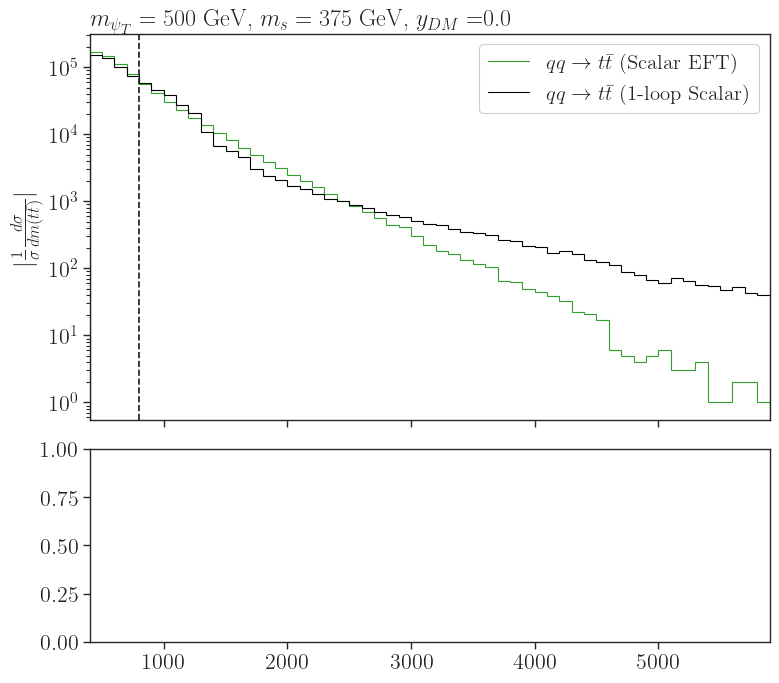

In [244]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']
    

bins = np.arange(400.,6000.,100.)   
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = [sns.color_palette('Paired')[2], sns.color_palette('Paired')[3]]

#Loop over the processes
for j,d in enumerate(select):
    if r'$g g \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        #c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        axarr[0].stairs(h, edges, color = c[j], label = labels[j] )
        print(sum(h), d['nevents'])
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].axvline(x=800, color='k', linestyle='--')
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

In [106]:
print(np.exp(10.5))

36315.502674246636


In [21]:
print(6.304100e+01 + 4.043310e+02)
print(4.673080e+02)

467.372
467.308


--------------------------------------------------
7-REGION FIT COEFFICIENTS for $q q \to t \bar{t}$ (Scalar EFT)
--------------------------------------------------
Coefficients for Region 1 (Bounds: < 650.0): 
[-2.94617680e-05  3.24223721e-02 -1.59817977e+01]

Coefficients for Region 2 (Bounds: 650.0-2800.0): 
[ 2.38235686e-07 -3.20847535e-03 -5.25669108e+00]

Coefficients for Region 3 (Bounds: 2800.0-3700.0): 
[ 9.52026749e-07 -8.07826100e-03  2.82674821e+00]

Coefficients for Region 4 (Bounds: 3700.0-4600.0): 
[-3.03319486e-07  7.18742053e-04 -1.28171963e+01]

Coefficients for Region 5 (Bounds: 4600.0-7950.0): 
[ 4.66381256e-07 -5.84176454e-03  8.41441282e-02]

--------------------------------------------------


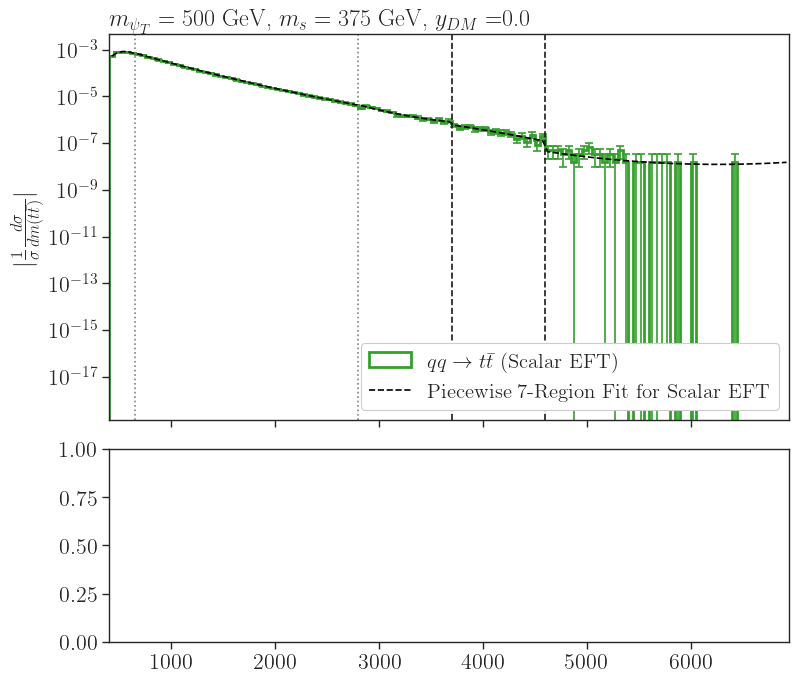

In [280]:

# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False

#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']

bins = np.arange(400., 7000., 50.0)
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select):
    if r'$g g \to t \bar{t}$' in d['process'] or 'Scalar EFT' not in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                             color=c[j],alpha=1.0,histtype='step',
                             linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        yErr = hErr
        axarr[0].errorbar(x,aux[0], yerr = yErr,
                             color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
        # =================================================================
        # START: 7-Part Piecewise Fit Section
        # =================================================================
        
        # 1. Prepare the data for fitting
        bin_centers = (edges[:-1] + edges[1:]) / 2.0
        counts_for_fit = np.abs(h)
        
        # 2. Define the fit boundaries (7 regions need 6 boundaries)
        bound_1 = 650.0
        bound_2 = 2800.0
        bound_3 = 3700.0
        bound_4 = 4600.0 # New boundary
        bound_5 = 7950.0 # Original bound_3
        bound_6 = 7950.0 # Original bound_4
        # ----------------------
        
        # --- DEFINE THE SAFETY MARGIN FOR EACH REGION (7 regions now) ---
        safety_margins = {
            'region1': 0.0, 
            'region2': 0.0, 
            'region3': 0.0, # New region 3
            'region4': 0.0, # New region 4 (Original valley)
            'region5': 0.2, # New region 5
            'region6': 0.0, # Original region 4
            'region7': 0.0  # Original region 5
        }
        # -----------------------------------------------
        
        # 3. Create masks for each of the seven regions
        mask1 = (counts_for_fit > 0) & (bin_centers < bound_1)
        mask2 = (counts_for_fit > 0) & (bin_centers >= bound_1) & (bin_centers < bound_2)
        
        # Original Region 3 is split into R3, R4, R5
        mask3 = (counts_for_fit > 0) & (bin_centers >= bound_2) & (bin_centers < bound_3) 
        mask4 = (counts_for_fit > 0) & (bin_centers >= bound_3) & (bin_centers < bound_4)
        mask5 = (counts_for_fit > 0) & (bin_centers >= bound_4) & (bin_centers < bound_5) 
        
        # Original Region 4 and 5 are now R6 and R7
        mask6 = (counts_for_fit > 0) & (bin_centers >= bound_5) & (bin_centers < bound_6) 
        mask7 = (counts_for_fit > 0) & (bin_centers >= bound_6)
        
        # --- Fit the seven regions separately ---
        # Initialize a list of 7 slots for coefficients
        coeffs = [None] * 7 
        
        # R1
        if np.sum(mask1) > 2:
            log_counts = np.log(counts_for_fit[mask1]) - safety_margins['region1']
            coeffs[0] = np.polyfit(bin_centers[mask1], log_counts, 2)
        # R2
        if np.sum(mask2) > 2:
            log_counts = np.log(counts_for_fit[mask2]) - safety_margins['region2']
            coeffs[1] = np.polyfit(bin_centers[mask2], log_counts, 2)
        # R3 (New)
        if np.sum(mask3) > 2:
            log_counts = np.log(counts_for_fit[mask3]) - safety_margins['region3']
            coeffs[2] = np.polyfit(bin_centers[mask3], log_counts, 2)
        # R4 (New, likely the valley)
        if np.sum(mask4) > 2:
            log_counts = np.log(counts_for_fit[mask4]) - safety_margins['region4']
            coeffs[3] = np.polyfit(bin_centers[mask4], log_counts, 2)
        # R5 (New)
        if np.sum(mask5) > 2:
            log_counts = np.log(counts_for_fit[mask5]) - safety_margins['region5']
            coeffs[4] = np.polyfit(bin_centers[mask5], log_counts, 2)
        # R6 (Original R4)
        if np.sum(mask6) > 2:
            log_counts = np.log(counts_for_fit[mask6]) - safety_margins['region6']
            coeffs[5] = np.polyfit(bin_centers[mask6], log_counts, 2)
        # R7 (Original R5)
        if np.sum(mask7) > 2:
            log_counts = np.log(counts_for_fit[mask7]) - safety_margins['region7']
            coeffs[6] = np.polyfit(bin_centers[mask7], log_counts, 2)

        bound_names = [
            f'< {bound_1}', 
            f'{bound_1}-{bound_2}', 
            f'{bound_2}-{bound_3}', 
            f'{bound_3}-{bound_4}', 
            f'{bound_4}-{bound_5}', 
            f'{bound_5}-{bound_6}', 
            f'> {bound_6}'
        ]
        # Print all the coefficients for your Fortran code
        print("-" * 50)
        print(f"7-REGION FIT COEFFICIENTS for {label}")
        print("-" * 50)
        for i, cf in enumerate(coeffs):
            if cf is not None:
                print(f"Coefficients for Region {i+1} (Bounds: {bound_names[i]}): \n{cf}\n")
        print("-" * 50)

        # --- PLOTTING PART: Construct the full 7-part curve ---
        y_fit = np.zeros_like(bin_centers)
        
        plot_mask1 = bin_centers < bound_1
        plot_mask2 = (bin_centers >= bound_1) & (bin_centers < bound_2)
        plot_mask3 = (bin_centers >= bound_2) & (bin_centers < bound_3)
        plot_mask4 = (bin_centers >= bound_3) & (bin_centers < bound_4)
        plot_mask5 = (bin_centers >= bound_4) & (bin_centers < bound_5)
        plot_mask6 = (bin_centers >= bound_5) & (bin_centers < bound_6)
        plot_mask7 = bin_centers >= bound_6
        
        plot_masks = [plot_mask1, plot_mask2, plot_mask3, plot_mask4, plot_mask5, plot_mask6, plot_mask7]
        bound_names = ['< B1', 'B1-B2', 'B2-B3', 'B3-B4', 'B4-B5', 'B5-B6', '> B6']
        
        for i, (cf, mask) in enumerate(zip(coeffs, plot_masks)):
            if cf is not None:
                p = np.poly1d(cf)
                y_fit[mask] = np.exp(p(bin_centers[mask]))

        # Plot the final combined curve
        axarr[0].plot(bin_centers[y_fit > 0], y_fit[y_fit > 0], color='black', linestyle='--', 
                      label=f'Piecewise 7-Region Fit for {model}')
        
        # =================================================================
        # END: 7-Part Piecewise Fit Section
        # =================================================================
                  
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='lower right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].axvline(x=bound_1, color='gray', linestyle=':')
axarr[0].axvline(x=bound_2, color='gray', linestyle=':')
axarr[0].axvline(x=bound_3, color='k', linestyle='--')
axarr[0].axvline(x=bound_4, color='k', linestyle='--')
axarr[0].axvline(x=bound_5, color='gray', linestyle=':')
axarr[0].axvline(x=bound_6, color='gray', linestyle=':')

plt.show()

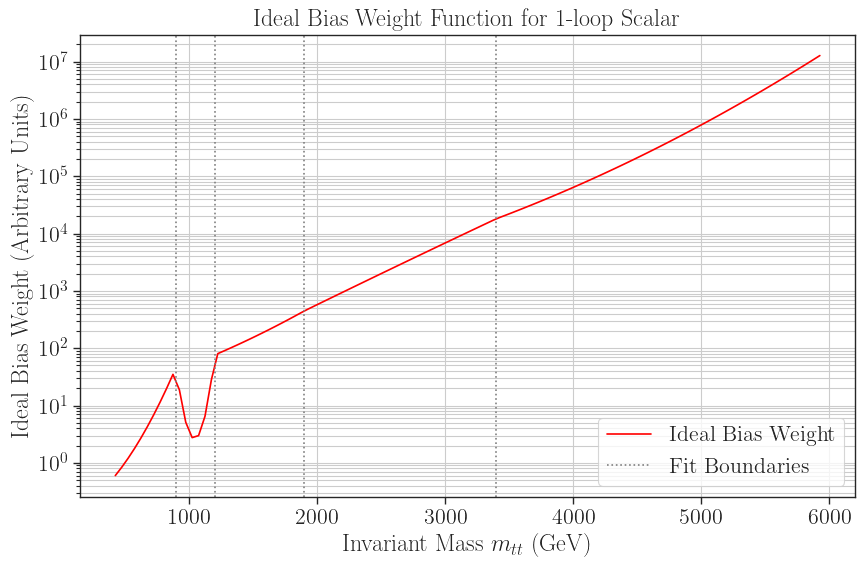

In [93]:
# This cell assumes that 'coeffs', 'bin_centers', 'model', and the 'bound_#'
# variables have been defined by running your 5-part fitting cell.

# 1. Create a new, separate plot for the bias weight
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Reconstruct the polynomial functions from the stored coefficients list
polynomials = [np.poly1d(c) if c is not None else None for c in coeffs]

# 3. Initialize the array for the full curve and define a normalization point
y_inverse_fit = np.zeros_like(bin_centers)
norm_point = 500.0 # The mtt value where the bias weight will be 1

# --- Logic to create a smooth, continuous 5-part curve ---
# Re-create the plotting masks to define the regions
plot_mask1 = bin_centers < bound_1
plot_mask2 = (bin_centers >= bound_1) & (bin_centers < bound_2)
plot_mask3 = (bin_centers >= bound_2) & (bin_centers < bound_3)
plot_mask4 = (bin_centers >= bound_3) & (bin_centers < bound_4)
plot_mask5 = bin_centers >= bound_4

# Calculate and normalize the first piece
p1 = polynomials[0]
offset = p1(norm_point) # This is the value to subtract to make the weight 1 at norm_point
if p1 is not None:
    y_inverse_fit[plot_mask1] = np.exp(-p1(bin_centers[plot_mask1]) + offset)

# Stitch the remaining pieces sequentially
p2, p3, p4, p5 = polynomials[1], polynomials[2], polynomials[3], polynomials[4]

if p1 is not None and p2 is not None:
    y_end_of_1 = np.exp(-p1(bound_1) + offset)
    y_start_of_2 = np.exp(-p2(bound_1))
    stitch_factor_2 = y_end_of_1 / y_start_of_2
    y_inverse_fit[plot_mask2] = stitch_factor_2 * np.exp(-p2(bin_centers[plot_mask2]))

if p2 is not None and p3 is not None:
    y_end_of_2 = stitch_factor_2 * np.exp(-p2(bound_2))
    y_start_of_3 = np.exp(-p3(bound_2))
    stitch_factor_3 = y_end_of_2 / y_start_of_3
    y_inverse_fit[plot_mask3] = stitch_factor_3 * np.exp(-p3(bin_centers[plot_mask3]))
    
if p3 is not None and p4 is not None:
    y_end_of_3 = stitch_factor_3 * np.exp(-p3(bound_3))
    y_start_of_4 = np.exp(-p4(bound_3))
    stitch_factor_4 = y_end_of_3 / y_start_of_4
    y_inverse_fit[plot_mask4] = stitch_factor_4 * np.exp(-p4(bin_centers[plot_mask4]))

if p4 is not None and p5 is not None:
    y_end_of_4 = stitch_factor_4 * np.exp(-p4(bound_4))
    y_start_of_5 = np.exp(-p5(bound_4))
    stitch_factor_5 = y_end_of_4 / y_start_of_5
    y_inverse_fit[plot_mask5] = stitch_factor_5 * np.exp(-p5(bin_centers[plot_mask5]))


# 4. Plot the final combined curve for the bias weight
ax.plot(bin_centers, y_inverse_fit, 
        color='red', linestyle='-', label='Ideal Bias Weight')

# 5. Add vertical lines to show the boundaries of the fit regions
ax.axvline(x=bound_1, color='gray', linestyle=':')
ax.axvline(x=bound_2, color='gray', linestyle=':')
ax.axvline(x=bound_3, color='gray', linestyle=':')
ax.axvline(x=bound_4, color='gray', linestyle=':', label='Fit Boundaries')


# 6. Configure the plot
ax.set_yscale('log')
ax.set_xlabel('Invariant Mass $m_{tt}$ (GeV)')
ax.set_ylabel('Ideal Bias Weight (Arbitrary Units)')
ax.set_title(f'Ideal Bias Weight Function for {model}')
ax.legend()
ax.grid(True, which='both')

plt.show()

In [281]:
#Reading files with bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/SMS_*/qq2ttbar_gs4_ydm2/run_exp/*.npz'))
#files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/qq2ttbar_gs4_ydm2/run_exp/*.npz'))
#files = list(glob.glob('/home/vinicius/EFT_ToyModel/test/Distributions/bias/*/*/*.npz'))
data_exp = []
#Loading the distributions
for f in files:
    aux = np.load(f, allow_pickle = True)
    data_exp.append(aux)
        

data_exp = sorted(data_exp, key=lambda d: d['mass_params'][0])

In [282]:
select1 = []
for d in data_exp:
    if d['mass_params'][0] == 500.0 and d['mass_params'][1] == 375.0:
        select1.append(d)

print(select1)

[NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/SMS_EFT/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_375.npz' with keys: mTT, pT1, pT2, deltaPhi, weights..., NpzFile '/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/SMS_1_loop/qq2ttbar_gs4_ydm2/run_exp/mPsiT_500_mSDM_375.npz' with keys: mTT, pT1, pT2, deltaPhi, weights...]


195395 200000


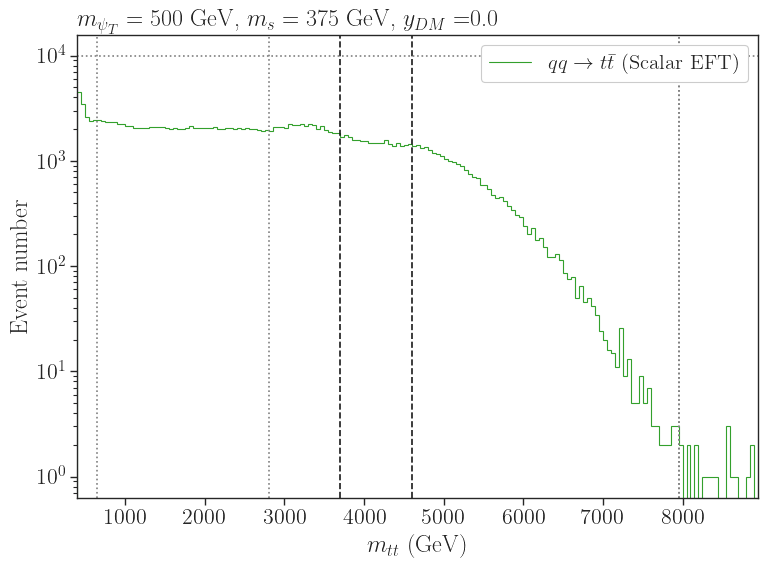

In [283]:
fig, ax = plt.subplots(figsize=(8, 6))

# BSM masses
mPsiT,mSDM = select1[0]['mass_params']

# Couping
yDM = select1[0]['ydm']
    
bins = np.arange(400.,9000.,50.)    
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

# Loop over the processes
for j,d in enumerate(select1):
    if r'$g g \to t \bar{t}$' in d['process'] or 'Scalar EFT' not in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        h1, _ = np.histogram(d['mTT'],bins=bins, weights = d['weights'])
        hists.append(h)
        # Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
        # --- MODIFIED PART 2: Use 'ax' instead of 'axarr[0]' ---
        # Plotting the BSM hists
        ax.stairs(h, edges, color = c[j], label = labels[j] )
        
        print(sum(h), d['nevents'])
            
# Main plot configs
ax.legend(framealpha=1.0,loc='upper right',fontsize=15)
ax.set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                  loc='left')
ax.set_yscale('log')
ax.set_ylabel(r'Event number')
ax.set_xlabel(r'$m_{tt}$ (GeV)') # Added x-label for the single plot
ax.set_xlim(bins.min(),bins.max())
#ax.axvline(x=2550, color='k', linestyle='--')

ax.axvline(x=bound_1, color='gray', linestyle=':')
ax.axvline(x=bound_2, color='gray', linestyle=':')
ax.axvline(x=bound_3, color='k', linestyle='--')
ax.axvline(x=bound_4, color='k', linestyle='--')
ax.axvline(x=bound_5, color='gray', linestyle=':')
ax.axvline(x=bound_6, color='gray', linestyle=':')

ax.axhline(y=1e4, color='gray', linestyle=':')
# Use tight_layout() for better spacing
plt.tight_layout()
plt.show()

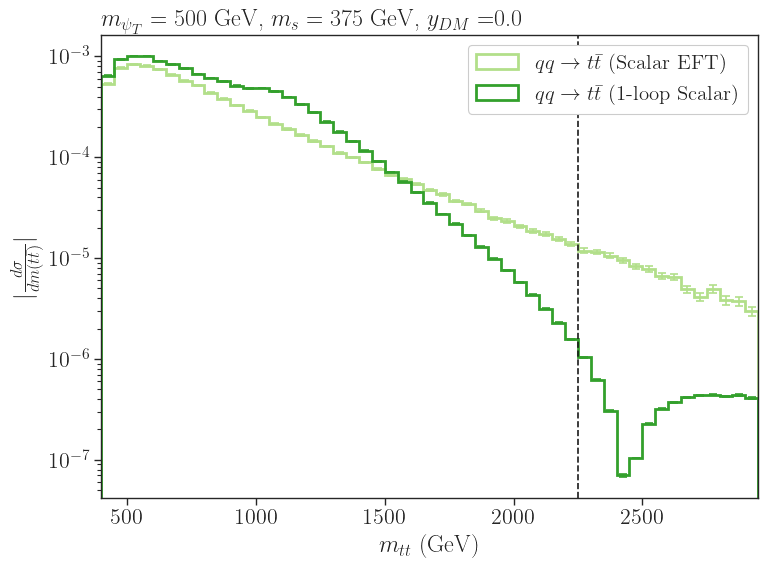

In [257]:
fig, ax = plt.subplots(figsize=(8, 6))

# BSM masses
mPsiT,mSDM = select1[0]['mass_params']

# Couping
yDM = select1[0]['ydm']
    
bins = np.arange(400.,3000.,50.)
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
#c = []
c = [sns.color_palette('Paired')[2], sns.color_palette('Paired')[3]]

#Loop over the processes
for j,d in enumerate(select1):
    # This logic was slightly changed to match what seems intended
    if r'$g g \to t \bar{t}$' in d['process'] and 'EFT' in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        #c.append(selectColor(model,process))
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
        # --- MODIFIED PART 2: Use 'ax' instead of 'axarr[0]' ---
        #Plotting the BSM hists
        aux = ax.hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                           color=c[j],alpha=1.0,histtype='step', 
                           linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        yErr = hErr
        ax.errorbar(x,aux[0], yerr = yErr,
                           color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
            
#Main plot configs
ax.legend(framealpha=1.0,loc='upper right',fontsize=15)
ax.set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                  loc='left')
ax.set_yscale('log')
ax.set_ylabel(r'$|\frac{d \sigma}{d m(t\bar{t})}|$')
ax.set_xlabel(r'$m_{tt}$ (GeV)') # Added x-label for the single plot
ax.set_xlim(bins.min(),bins.max())
ax.axvline(x=2250, color='k', linestyle='--')

# Use tight_layout for automatic spacing
plt.tight_layout()
plt.show()

56


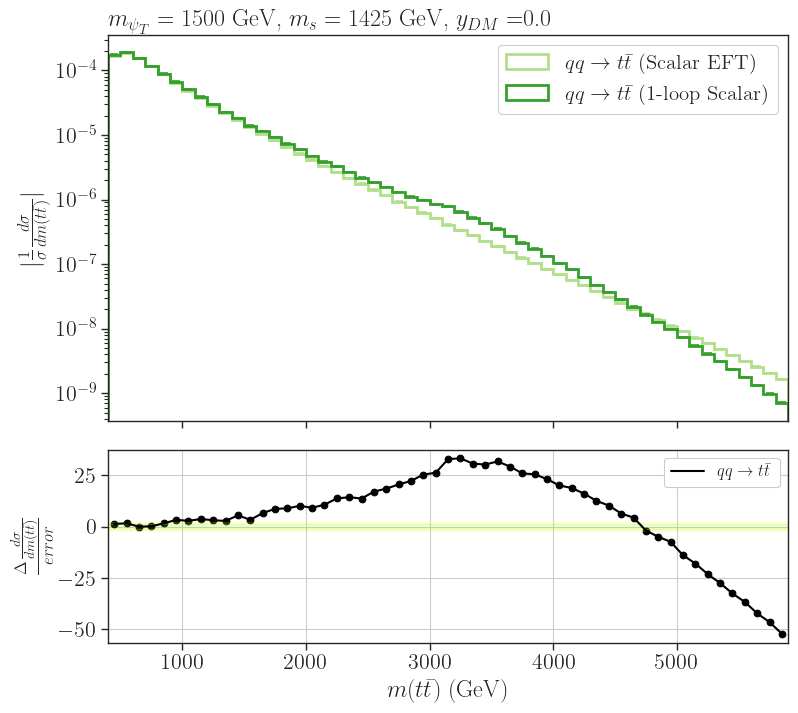

In [235]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False


#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select1[0]['mass_params']

#Couping
yDM = select1[0]['ydm']
    

bins = np.arange(400.,6000.,100.)
print(len(bins))
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
#c = []
c = [sns.color_palette('Paired')[2], sns.color_palette('Paired')[3]]
#Loop over the processes
for j,d in enumerate(select1):
    #if r'$q q \to t \bar{t}$' in d['process']:
     #   labels.append('0')
      #  c.append('0')
       # continue
    #else:
    process = d['process']
    model = d['model']
    weights = d['weights']
    pmodels.append(r'%s (%s)' %(process,model))
    label = pmodels[-1]
    labels.append(label)
    #c.append(selectColor(model,process))
    h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
    hists.append(h)
    #Compute MC error
    hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
    hErr = np.sqrt(hErr)    
    histsErr.append(hErr)
    #Plotting the BSM hists
    aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                      color=c[j],alpha=1.0,histtype='step', 
                     linewidth=2,fill=False,linestyle='solid')
    
    #Plotting the errors
    x = (bins[:-1]+bins[1:])/2.0
    y = aux[0]
    #Propagating the error since we are dealing with normalized histograms
    #yErr = np.array(abs(y)*np.sqrt((np.array(hErr)/np.array(h))**2 + sum(np.array(hErr)**2)/(sum(h)**2)))
    yErr = hErr
    axarr[0].errorbar(x,aux[0], yerr = yErr,
                  color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
#axarr[0].set_ylim(1e-8,1e-1)

#Ratio plot
    
# Separating the EFT and the 1-loop UV results
hLoop = hists[1]
hLoop_Err = histsErr[1]
hEFT = hists[0]
hEFT_Err = histsErr[0]

#Computing the ratio EFT/1-loop UV and its error
labels_r = [r'$q q \to t \bar{t}$']
ratio = np.divide(hEFT , hLoop, out=np.zeros_like(hLoop),where=hLoop != 0)
ratio_Err = abs(ratio)*np.sqrt((np.array(hEFT_Err)/np.array(hEFT))**2 + (np.array(hLoop_Err)/np.array(hLoop))**2)
# Remove zero values
nonzero = np.where((np.sign(ratio) != 0))

#Computing the difference (1-Loop - EFT) and its error:
diff = hLoop - hEFT
diff_err = np.sqrt(np.array(hLoop_Err)**2 + np.array(hEFT_Err)**2)

#Verifying the type of the subplot
label = labels_r[0]
#Ratio plot
if ratio_plot == True:
    y = ratio
    y_err = ratio_Err
    y_label = r'$N_{EFT}/N_{1-loop}$'
    #axarr[1].plot(x, (1 - y)/y_err,linewidth=1.5,linestyle='solid',alpha=1,
                         #label=label,c=c[j]) 
    #axarr[1].scatter(x, (1 - y)/y_err ,color=c[j]) #Plot to see how many error bars the fraction is distance than one
    axarr[1].plot(x, y,linewidth=1.5,linestyle='solid',alpha=1,
                         label=label,c=c[j]) 
    axarr[1].errorbar(x,y, yerr = y_err,
                      color=c[j], fmt = 'o', ms = 0, capsize = 3.5, capthick = 1.2 )
    axarr[1].set_ylim(-1.5,1.5)
    
    axarr[1].axhline(y=1, color='k', linestyle='--')
    #axarr[1].axhline(y=2, color='k', linestyle='--', alpha = 0.3)
    axarr[1].axhline(y=-1, color='k', linestyle='--')
    #axarr[1].axhline(y=-2, color='k', linestyle='--', alpha = 0.3)
    #axarr[1].set_ylim(2.5,1.5)
    
#Diff over error plot
else:
    y = np.array(diff)/np.array(diff_err)
    y_err = diff_err
    y_label = r'$\frac{\Delta \frac{d \sigma}{d m(t\bar{t})}}{error}$'
    #Plotting
    axarr[1].plot(x,y,linewidth=1.5,linestyle='solid',alpha=1,
                          label=label,c='0')
    axarr[1].scatter(x,y,color='0')
    axarr[1].axhspan(-1,1, color = 'lawngreen', alpha = 0.15)
    axarr[1].axhspan(1,2, color = 'yellow', alpha = 0.15)
    axarr[1].axhspan(-1,-2, color = 'yellow', alpha = 0.15)

    



#Subplot configs
axarr[1].set_ylabel(y_label)
#axarr[1].set_ylim(-5.5,5.5)
#axarr[1].set_yticks(np.arange(-0.01,0.05,0.01))
#axarr[1].set_yscale('log')
axarr[1].grid()
axarr[1].set_xlabel(r'$m(t\bar{t})$ (GeV)')
axarr[1].legend(loc='upper right',fontsize=12,framealpha=1.0,ncol=2)
    
    
plt.show()

# Exponential Bias without the offset

In [ ]:
#Reading files with bias
files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/*/qq2ttbar_gs4_ydm2/run_exp_no_offset/*.npz'))
#files = list(glob.glob('/home/vinicius/EFT_ToyModel/test/Distributions/bias/*/*/*.npz'))
data_exp1 = []
#Loading the distributions
for f in files:
    aux = np.load(f, allow_pickle = True)
    data_exp1.append(aux)
        


data_exp1 = sorted(data_exp1, key=lambda d: d['mass_params'][0])
select2 = data_exp1

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# BSM masses
mPsiT,mSDM = select1[0]['mass_params']

# Couping
yDM = select1[0]['ydm']
    
bins = np.arange(400.,5000.,50.)    
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

# Loop over the processes
for j,d in enumerate(select2):
    if r'$g g \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        h1, _ = np.histogram(d['mTT'],bins=bins, weights = d['weights'])
        hists.append(h)
        # Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
        # --- MODIFIED PART 2: Use 'ax' instead of 'axarr[0]' ---
        # Plotting the BSM hists
        ax.stairs(h, edges, color = c[j], label = labels[j] )
        
        print(sum(h), d['nevents'])
            
# Main plot configs
ax.legend(framealpha=1.0,loc='upper right',fontsize=15)
ax.set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                  loc='left')
ax.set_yscale('log')
ax.set_ylabel(r'Event number')
ax.set_xlabel(r'$m_{tt}$ (GeV)') # Added x-label for the single plot
ax.set_xlim(bins.min(),bins.max())
#ax.axvline(x=1850, color='k', linestyle='--')

# Use tight_layout() for better spacing
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# BSM masses
mPsiT,mSDM = select1[0]['mass_params']

# Couping
yDM = select1[0]['ydm']
    
bins = np.arange(400.,2000.,50.)
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select2):
    # This logic was slightly changed to match what seems intended
    if r'$g g \to t \bar{t}$' in d['process'] and 'EFT' not in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
        # --- MODIFIED PART 2: Use 'ax' instead of 'axarr[0]' ---
        #Plotting the BSM hists
        aux = ax.hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                           color=c[j],alpha=1.0,histtype='step', 
                           linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        yErr = hErr
        ax.errorbar(x,aux[0], yerr = yErr,
                           color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
            
#Main plot configs
ax.legend(framealpha=1.0,loc='upper right',fontsize=15)
ax.set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                  loc='left')
ax.set_yscale('log')
ax.set_ylabel(r'$|\frac{d \sigma}{d m(t\bar{t})}|$')
ax.set_xlabel(r'$m_{tt}$ (GeV)') # Added x-label for the single plot
ax.set_xlim(bins.min(),bins.max())
ax.axvline(x=2250, color='k', linestyle='--')

# Use tight_layout for automatic spacing
plt.tight_layout()
plt.show()

# Finding bias for SM

In [ ]:
#Reading files with bias
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/sm/pp2ttbar_gs4/*.npz'))
data_sm = []
#Loading the distributions
for f in  sm_files:
    aux = np.load(f, allow_pickle = True)
    data_sm.append(aux)
        


data_sm = sorted(data_sm, key=lambda d: d['mass_params'][0])

In [ ]:



# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False

select = data_sm

#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']
    

bins = np.arange(400.,6000.,100.)   
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = [sns.color_palette('Paired')[2], sns.color_palette('Paired')[3]]

#Loop over the processes
for j,d in enumerate(select):
    if r'$q q \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        #c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        axarr[0].stairs(h, edges, color = c[j], label = labels[j] )
        print(sum(h), d['nevents'])
                      
       
           
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].axvline(x=800, color='k', linestyle='--')
#axarr[0].set_ylim(1e-8,1e-1)



    
plt.show()

In [ ]:

# Generating the BSM histograms and plotting them

#Selecting the type of subplot
ratio_plot = False

#Defining the space for the two plots 
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(8,8))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#BSM masses
mPsiT,mSDM = select[0]['mass_params']

#Couping
yDM = select[0]['ydm']

bins = np.arange(400., 8000., 100.0)
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select1):
    if r'$q q \to t \bar{t}$' in d['process'] or 'Scalar EFT' in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        #Plotting the BSM hists
        aux = axarr[0].hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                             color=c[j],alpha=1.0,histtype='step',
                             linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        yErr = hErr
        axarr[0].errorbar(x,aux[0], yerr = yErr,
                             color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
        # =================================================================
        # START: 7-Part Piecewise Fit Section
        # =================================================================
        
        # 1. Prepare the data for fitting
        bin_centers = (edges[:-1] + edges[1:]) / 2.0
        counts_for_fit = np.abs(h)
        
        # 2. Define the fit boundaries (7 regions need 6 boundaries)
        bound_1 = 1900.0
        bound_2 = 3000.0
        bound_3 = 5500.0
        bound_4 = 8500.0 # New boundary
        bound_5 = 8500.0 # Original bound_3
        bound_6 = 8500.0 # Original bound_4
        # ----------------------
        
        # --- DEFINE THE SAFETY MARGIN FOR EACH REGION (7 regions now) ---
        safety_margins = {
            'region1': 0.0, 
            'region2': 0.0, 
            'region3': 0.0, # New region 3
            'region4': 0.0, # New region 4 (Original valley)
            'region5': 0.0, # New region 5
            'region6': 0.0, # Original region 4
            'region7': 0.0  # Original region 5
        }
        # -----------------------------------------------
        
        # 3. Create masks for each of the seven regions
        mask1 = (counts_for_fit > 0) & (bin_centers < bound_1)
        mask2 = (counts_for_fit > 0) & (bin_centers >= bound_1) & (bin_centers < bound_2)
        
        # Original Region 3 is split into R3, R4, R5
        mask3 = (counts_for_fit > 0) & (bin_centers >= bound_2) & (bin_centers < bound_3) 
        mask4 = (counts_for_fit > 0) & (bin_centers >= bound_3) & (bin_centers < bound_4)
        mask5 = (counts_for_fit > 0) & (bin_centers >= bound_4) & (bin_centers < bound_5) 
        
        # Original Region 4 and 5 are now R6 and R7
        mask6 = (counts_for_fit > 0) & (bin_centers >= bound_5) & (bin_centers < bound_6) 
        mask7 = (counts_for_fit > 0) & (bin_centers >= bound_6)
        
        # --- Fit the seven regions separately ---
        # Initialize a list of 7 slots for coefficients
        coeffs = [None] * 7 
        
        # R1
        if np.sum(mask1) > 2:
            log_counts = np.log(counts_for_fit[mask1]) - safety_margins['region1']
            coeffs[0] = np.polyfit(bin_centers[mask1], log_counts, 2)
        # R2
        if np.sum(mask2) > 2:
            log_counts = np.log(counts_for_fit[mask2]) - safety_margins['region2']
            coeffs[1] = np.polyfit(bin_centers[mask2], log_counts, 2)
        # R3 (New)
        if np.sum(mask3) > 2:
            log_counts = np.log(counts_for_fit[mask3]) - safety_margins['region3']
            coeffs[2] = np.polyfit(bin_centers[mask3], log_counts, 2)
        # R4 (New, likely the valley)
        if np.sum(mask4) > 2:
            log_counts = np.log(counts_for_fit[mask4]) - safety_margins['region4']
            coeffs[3] = np.polyfit(bin_centers[mask4], log_counts, 2)
        # R5 (New)
        if np.sum(mask5) > 2:
            log_counts = np.log(counts_for_fit[mask5]) - safety_margins['region5']
            coeffs[4] = np.polyfit(bin_centers[mask5], log_counts, 2)
        # R6 (Original R4)
        if np.sum(mask6) > 2:
            log_counts = np.log(counts_for_fit[mask6]) - safety_margins['region6']
            coeffs[5] = np.polyfit(bin_centers[mask6], log_counts, 2)
        # R7 (Original R5)
        if np.sum(mask7) > 2:
            log_counts = np.log(counts_for_fit[mask7]) - safety_margins['region7']
            coeffs[6] = np.polyfit(bin_centers[mask7], log_counts, 2)

        bound_names = [
            f'< {bound_1}', 
            f'{bound_1}-{bound_2}', 
            f'{bound_2}-{bound_3}', 
            f'{bound_3}-{bound_4}', 
            f'{bound_4}-{bound_5}', 
            f'{bound_5}-{bound_6}', 
            f'> {bound_6}'
        ]
        # Print all the coefficients for your Fortran code
        print("-" * 50)
        print(f"7-REGION FIT COEFFICIENTS for {label}")
        print("-" * 50)
        for i, cf in enumerate(coeffs):
            if cf is not None:
                print(f"Coefficients for Region {i+1} (Bounds: {bound_names[i]}): \n{cf}\n")
        print("-" * 50)

        # --- PLOTTING PART: Construct the full 7-part curve ---
        y_fit = np.zeros_like(bin_centers)
        
        plot_mask1 = bin_centers < bound_1
        plot_mask2 = (bin_centers >= bound_1) & (bin_centers < bound_2)
        plot_mask3 = (bin_centers >= bound_2) & (bin_centers < bound_3)
        plot_mask4 = (bin_centers >= bound_3) & (bin_centers < bound_4)
        plot_mask5 = (bin_centers >= bound_4) & (bin_centers < bound_5)
        plot_mask6 = (bin_centers >= bound_5) & (bin_centers < bound_6)
        plot_mask7 = bin_centers >= bound_6
        
        plot_masks = [plot_mask1, plot_mask2, plot_mask3, plot_mask4, plot_mask5, plot_mask6, plot_mask7]
        bound_names = ['< B1', 'B1-B2', 'B2-B3', 'B3-B4', 'B4-B5', 'B5-B6', '> B6']
        
        for i, (cf, mask) in enumerate(zip(coeffs, plot_masks)):
            if cf is not None:
                p = np.poly1d(cf)
                y_fit[mask] = np.exp(p(bin_centers[mask]))

        # Plot the final combined curve
        axarr[0].plot(bin_centers[y_fit > 0], y_fit[y_fit > 0], color='black', linestyle='--', 
                      label=f'Piecewise 7-Region Fit for {model}')
        
        # =================================================================
        # END: 7-Part Piecewise Fit Section
        # =================================================================
                  
#Main plot configs
axarr[0].legend(framealpha=1.0,loc='upper right',fontsize=15)
axarr[0].set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
               loc='left')
axarr[0].set_yscale('log')
axarr[0].set_ylabel(r'$|\frac{1}{\sigma}\frac{d \sigma}{d m(t\bar{t})}|$')
axarr[0].set_xlim(bins.min(),bins.max())
axarr[0].axvline(x=bound_1, color='gray', linestyle=':')
axarr[0].axvline(x=bound_2, color='gray', linestyle=':')
axarr[0].axvline(x=bound_3, color='k', linestyle='--')
axarr[0].axvline(x=bound_4, color='k', linestyle='--')
axarr[0].axvline(x=bound_5, color='gray', linestyle=':')
axarr[0].axvline(x=bound_6, color='gray', linestyle=':')

plt.show()

In [ ]:
#Reading files with bias
sm_files = list(glob.glob('/home/vinicius/EFT_ToyModel/processFolders/Distributions/bias/sm/pp2ttbar_gs4/*.npz'))
data_sm_exp = []
#Loading the distributions
for f in  sm_files:
    aux = np.load(f, allow_pickle = True)
    data_sm_exp.append(aux)
        


data_sm_exp = sorted(data_sm_exp, key=lambda d: d['mass_params'][0])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

select1 = data_sm_exp
# BSM masses
mPsiT,mSDM = select1[0]['mass_params']

# Couping
yDM = select1[0]['ydm']
    
bins = np.arange(100.,8000.,100.)    
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

# Loop over the processes
for j,d in enumerate(select1):
    if r'$q q \to t \bar{t}$' in d['process']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h, edges = np.histogram(d['mTT'],bins=bins)
        h1, _ = np.histogram(d['mTT'],bins=bins, weights = d['weights'])
        hists.append(h)
        # Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
        # --- MODIFIED PART 2: Use 'ax' instead of 'axarr[0]' ---
        # Plotting the BSM hists
        ax.stairs(h, edges, color = c[j], label = labels[j] )
        
        print(sum(h), d['nevents'])
            
# Main plot configs
ax.legend(framealpha=1.0,loc='upper right',fontsize=15)
ax.set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                  loc='left')
ax.set_yscale('log')
ax.set_ylabel(r'Event number')
ax.set_xlabel(r'$m_{tt}$ (GeV)') # Added x-label for the single plot
ax.set_xlim(bins.min(),bins.max())
ax.axvline(x=2550, color='k', linestyle='--')

# Use tight_layout() for better spacing
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

select1 = data_sm_exp
# BSM masses
mPsiT,mSDM = select1[0]['mass_params']

# Couping
yDM = select1[0]['ydm']
    
bins = np.arange(400.,8300.,100.)
    
#BSM plot arrays
labels = []
pmodels = []
hists = []
histsErr = []
c = []

#Loop over the processes
for j,d in enumerate(select1):
    # This logic was slightly changed to match what seems intended
    if r'$g g \to t \bar{t}$' in d['process'] and 'EFT' not in d['model']:
        labels.append('0')
        c.append('0')
        continue
    else:
        process = d['process']
        model = d['model']
        weights = d['weights']
        pmodels.append(r'%s (%s)' %(process,model))
        label = pmodels[-1]
        labels.append(label)
        c.append(selectColor(model,process))
        h,_ = np.histogram(d['mTT'],bins=bins,weights=d['weights'])
        hists.append(h)
        #Compute MC error
        hErr,_ = np.histogram(d['mTT'],bins=bins,weights=(d['weights'])**2)
        hErr = np.sqrt(hErr)    
        histsErr.append(hErr)
        
        # --- MODIFIED PART 2: Use 'ax' instead of 'axarr[0]' ---
        #Plotting the BSM hists
        aux = ax.hist(bins[:-1],weights=abs(h),label=labels[j],bins=bins, 
                           color=c[j],alpha=1.0,histtype='step', 
                           linewidth=2,fill=False,linestyle='solid')
        
        #Plotting the errors
        x = (bins[:-1]+bins[1:])/2.0
        y = aux[0]
        yErr = hErr
        ax.errorbar(x,aux[0], yerr = yErr,
                           color=c[j], fmt = 'none', capsize = 3, capthick = 1.2, barsabove = True)
        
            
#Main plot configs
ax.legend(framealpha=1.0,loc='upper right',fontsize=15)
ax.set_title(r'$m_{\psi_T} = %1.0f$ GeV, $m_{s} = %1.0f$ GeV, $y_{DM} = $%1.1f' %(mPsiT,mSDM,yDM),
                  loc='left')
ax.set_yscale('log')
ax.set_ylabel(r'$|\frac{d \sigma}{d m(t\bar{t})}|$')
ax.set_xlabel(r'$m_{tt}$ (GeV)') # Added x-label for the single plot
ax.set_xlim(bins.min(),bins.max())
ax.axvline(x=2250, color='k', linestyle='--')

# Use tight_layout for automatic spacing
plt.tight_layout()
plt.show()